# Does the Category of the Business Affct whether it will remain open?

In [ ]:
# Libraries
import pandas as pd
import seaborn as sb
sb.set_theme()
import re
import os
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
business = pd.read_json(path_or_buf="/content/drive/MyDrive/Colab Notebooks/yelp_academic_dataset_business.json", lines=True)

In [ ]:
categories = business["categories"]

In [ ]:
print(categories)

0         Doctors, Traditional Chinese Medicine, Naturop...
1         Shipping Centers, Local Services, Notaries, Ma...
2         Department Stores, Shopping, Fashion, Home & G...
3         Restaurants, Food, Bubble Tea, Coffee & Tea, B...
4                                 Brewpubs, Breweries, Food
                                ...                        
150341                           Nail Salons, Beauty & Spas
150342    Pets, Nurseries & Gardening, Pet Stores, Hobby...
150343    Shopping, Jewelry, Piercing, Toy Stores, Beaut...
150344    Fitness/Exercise Equipment, Eyewear & Optician...
150345    Beauty & Spas, Permanent Makeup, Piercing, Tattoo
Name: categories, Length: 150346, dtype: object


Each business has multiple different categories tag

In [ ]:
## Count the number of categories
category_set = set()
category_count = Counter()
for category in categories:
  split = str(category).split(",")
  for index, data in enumerate(split):
    if data[0] == " ":
      split[index] = split[index][1:]
  category_count.update(split)
  for data in split:
    category_set.add(data)

print(category_count)

Counter({'Restaurants': 52268, 'Food': 27781, 'Shopping': 24395, 'Home Services': 14356, 'Beauty & Spas': 14292, 'Nightlife': 12281, 'Health & Medical': 11890, 'Local Services': 11198, 'Bars': 11065, 'Automotive': 10773, 'Event Planning & Services': 9895, 'Sandwiches': 8366, 'American (Traditional)': 8139, 'Active Life': 7687, 'Pizza': 7093, 'Coffee & Tea': 6703, 'Fast Food': 6472, 'Breakfast & Brunch': 6239, 'American (New)': 6097, 'Hotels & Travel': 5857, 'Home & Garden': 5799, 'Fashion': 5739, 'Burgers': 5636, 'Arts & Entertainment': 5434, 'Auto Repair': 5433, 'Hair Salons': 5046, 'Nail Salons': 4621, 'Mexican': 4600, 'Italian': 4573, 'Specialty Food': 4233, 'Doctors': 3763, 'Pets': 3758, 'Real Estate': 3577, 'Seafood': 3539, 'Fitness & Instruction': 3293, 'Professional Services': 3270, 'Hair Removal': 3239, 'Desserts': 3186, 'Chinese': 3169, 'Bakeries': 3150, 'Grocery': 3139, 'Salad': 3064, 'Hotels': 2977, 'Chicken Wings': 2966, 'Cafes': 2756, 'Ice Cream & Frozen Yogurt': 2657, 'Ca

In [ ]:
print("Total number of unique categories : ", len(category_set))

Total number of unique categories :  1312


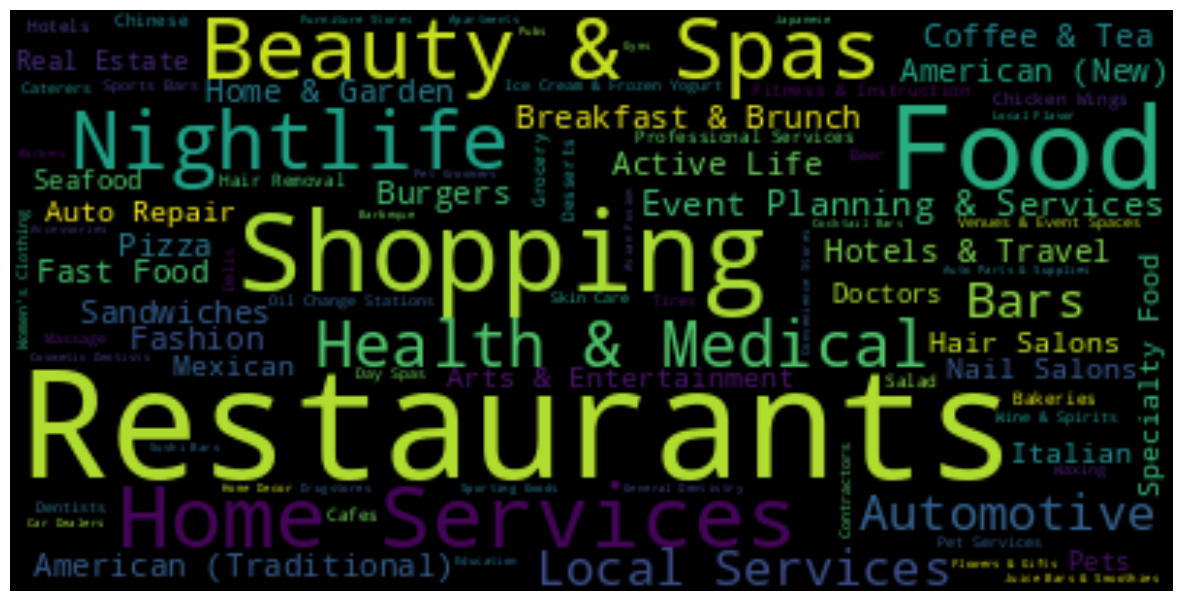

In [ ]:
wordcloud = WordCloud().generate_from_frequencies(category_count)

plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
## K-Means Clustering
cluster = 20
kmeans = KMeans(n_clusters = cluster)
vectorizer = TfidfVectorizer()
category_feature = vectorizer.fit_transform(list(category_set))
kmeans.fit(category_feature)
cluster_labels = kmeans.labels_

new_cat = []
for x in range(cluster):
  new_cat.append([])

for category, label in zip(list(category_set), cluster_labels):
  new_cat[label].append(category)

for x in new_cat:
  print(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


['Funeral Services & Cemeteries', 'Piano Services', 'Valet Services', 'Holiday Decorating Services', 'Nanny Services', 'Financial Services', 'Aquarium Services', 'Music Production Services', 'Translation Services', 'Appraisal Services', 'Reproductive Health Services', 'Couriers & Delivery Services', 'Refinishing Services', 'Shredding Services', 'Fireplace Services', 'Adoption Services', 'Blow Dry/Out Services', 'Musical Instrument Services', 'Billing Services', 'Lactation Services', 'Public Services & Government', 'Grout Services', 'Printing Services', 'Passport & Visa Services', 'Legal Services', 'Stucco Services', 'Car Share Services', 'Educational Services', 'Packing Services', 'Portable Toilet Services', 'Pet Services', 'Backflow Services', 'Real Estate Services', 'Debt Relief Services', 'Balloon Services', 'Travel Services', 'Tax Services', 'Mortuary Services', 'Aviation Services', 'Grill Services', 'Crane Services', 'Pet Cremation Services', 'Excavation Services', 'Gutter Service

It manage to cluster some categories, however there were some clusters that were still not clustered well and any remaining of the categories that wasn't able to be clustered are clustered into one. Overall, it was still hard to extract out main categories for our analysis so we decided to search online for possible yelp main categories.

We decided to check up on the yelp dataset category list online to see if there are any generalize main categories. [Yelp Dataset Categories](https://blog.yelp.com/businesses/yelp_category_list/). Surely enough they did separate the business categories into  `main categories` and each of them had `sub categories`. Therefore we decided to use the `main categories` provided in the site for our generalization.

In [ ]:
## Using based on yelp dataset main categories

category_list = ["Active Life", "Arts & Entertainment", "Automotive", "Beauty & Spas", "Education", "Event Planning & Services", "Financial Services", "Food", "Health & Medical", "Home Services", "Hotels & Travel", "Local Flavor", "Local Services",  "Mass Media", "Nightlife", "Pets", "Professional Services", "Public Services & Government", "Religious Organizations", "Restaurants", "Shopping", "Others"]

------------------

## Business Category Explanation

`Restaurants` is categorized to businesses where you can sit down and have a meal, typically with table service or a counter where you can order your foods.

`Food` is categorized as businesses that sell food items, but not necessarily in a sit-down dining format.

------------------

In [ ]:
test = business.copy(deep=False)
test = test.iloc[0:0]

category_df = []
category_count = []
for category in category_list:
  category_df.append(test.copy())
  category_count.append(0)

In [ ]:
# Exporting the different business categories into individual dataframe

for index, x in enumerate(categories):
  status = False
  ilocdata = business.iloc[index]
  if not x:
    category_df[-1].loc[category_count[-1]] = ilocdata
    category_count[-1] += 1
    status = True

  for category_index, category in enumerate(category_list):
    if x is None:
      break
    if category in x:
      category_df[category_index].loc[category_count[category_index]] = ilocdata
      category_count[category_index] += 1
      status = True
  if not status:
    category_df[-1].loc[category_count[-1]] = ilocdata
    category_count[-1] += 1

In [ ]:
# Exporting the dataframes into csv files
for index, dataframe in enumerate(category_df):
  path = ("/content/drive/MyDrive/Colab Notebooks/New Export/" + category_list[index] + ".csv")
  print(path)
  dataframe.to_csv(path_or_buf=path)

/content/drive/MyDrive/Colab Notebooks/New Export/Active Life.csv
/content/drive/MyDrive/Colab Notebooks/New Export/Arts & Entertainment.csv
/content/drive/MyDrive/Colab Notebooks/New Export/Automotive.csv
/content/drive/MyDrive/Colab Notebooks/New Export/Beauty & Spas.csv
/content/drive/MyDrive/Colab Notebooks/New Export/Education.csv
/content/drive/MyDrive/Colab Notebooks/New Export/Event Planning & Services.csv
/content/drive/MyDrive/Colab Notebooks/New Export/Financial Services.csv
/content/drive/MyDrive/Colab Notebooks/New Export/Food.csv
/content/drive/MyDrive/Colab Notebooks/New Export/Health & Medical.csv
/content/drive/MyDrive/Colab Notebooks/New Export/Home Services.csv
/content/drive/MyDrive/Colab Notebooks/New Export/Hotels & Travel.csv
/content/drive/MyDrive/Colab Notebooks/New Export/Local Flavor.csv
/content/drive/MyDrive/Colab Notebooks/New Export/Local Services.csv
/content/drive/MyDrive/Colab Notebooks/New Export/Mass Media.csv
/content/drive/MyDrive/Colab Notebooks/N

# Continue from after category seperation

In [ ]:
export_dir = "/content/drive/MyDrive/Colab Notebooks/New Export"

# csv_list = os.listdir(export_dir)
# csv_list = sorted(csv_list)
# print(csv_list)
new_category_df = []
for csv_name in category_list:
  csv_name = csv_name + ".csv"
  csv_path = os.path.join(export_dir, csv_name)
  print(csv_path)
  new_category_df.append(pd.read_csv(csv_path))

/content/drive/MyDrive/Colab Notebooks/New Export/Active Life.csv
/content/drive/MyDrive/Colab Notebooks/New Export/Arts & Entertainment.csv
/content/drive/MyDrive/Colab Notebooks/New Export/Automotive.csv
/content/drive/MyDrive/Colab Notebooks/New Export/Beauty & Spas.csv
/content/drive/MyDrive/Colab Notebooks/New Export/Education.csv
/content/drive/MyDrive/Colab Notebooks/New Export/Event Planning & Services.csv
/content/drive/MyDrive/Colab Notebooks/New Export/Financial Services.csv
/content/drive/MyDrive/Colab Notebooks/New Export/Food.csv
/content/drive/MyDrive/Colab Notebooks/New Export/Health & Medical.csv
/content/drive/MyDrive/Colab Notebooks/New Export/Home Services.csv
/content/drive/MyDrive/Colab Notebooks/New Export/Hotels & Travel.csv
/content/drive/MyDrive/Colab Notebooks/New Export/Local Flavor.csv
/content/drive/MyDrive/Colab Notebooks/New Export/Local Services.csv
/content/drive/MyDrive/Colab Notebooks/New Export/Mass Media.csv
/content/drive/MyDrive/Colab Notebooks/N

In [ ]:
new_category_df[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7954 entries, 0 to 7953
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    7954 non-null   int64  
 1   business_id   7954 non-null   object 
 2   name          7954 non-null   object 
 3   address       7741 non-null   object 
 4   city          7954 non-null   object 
 5   state         7954 non-null   object 
 6   postal_code   7950 non-null   object 
 7   latitude      7954 non-null   float64
 8   longitude     7954 non-null   float64
 9   stars         7954 non-null   float64
 10  review_count  7954 non-null   int64  
 11  is_open       7954 non-null   int64  
 12  attributes    7637 non-null   object 
 13  categories    7954 non-null   object 
 14  hours         6283 non-null   object 
dtypes: float64(3), int64(3), object(9)
memory usage: 932.2+ KB


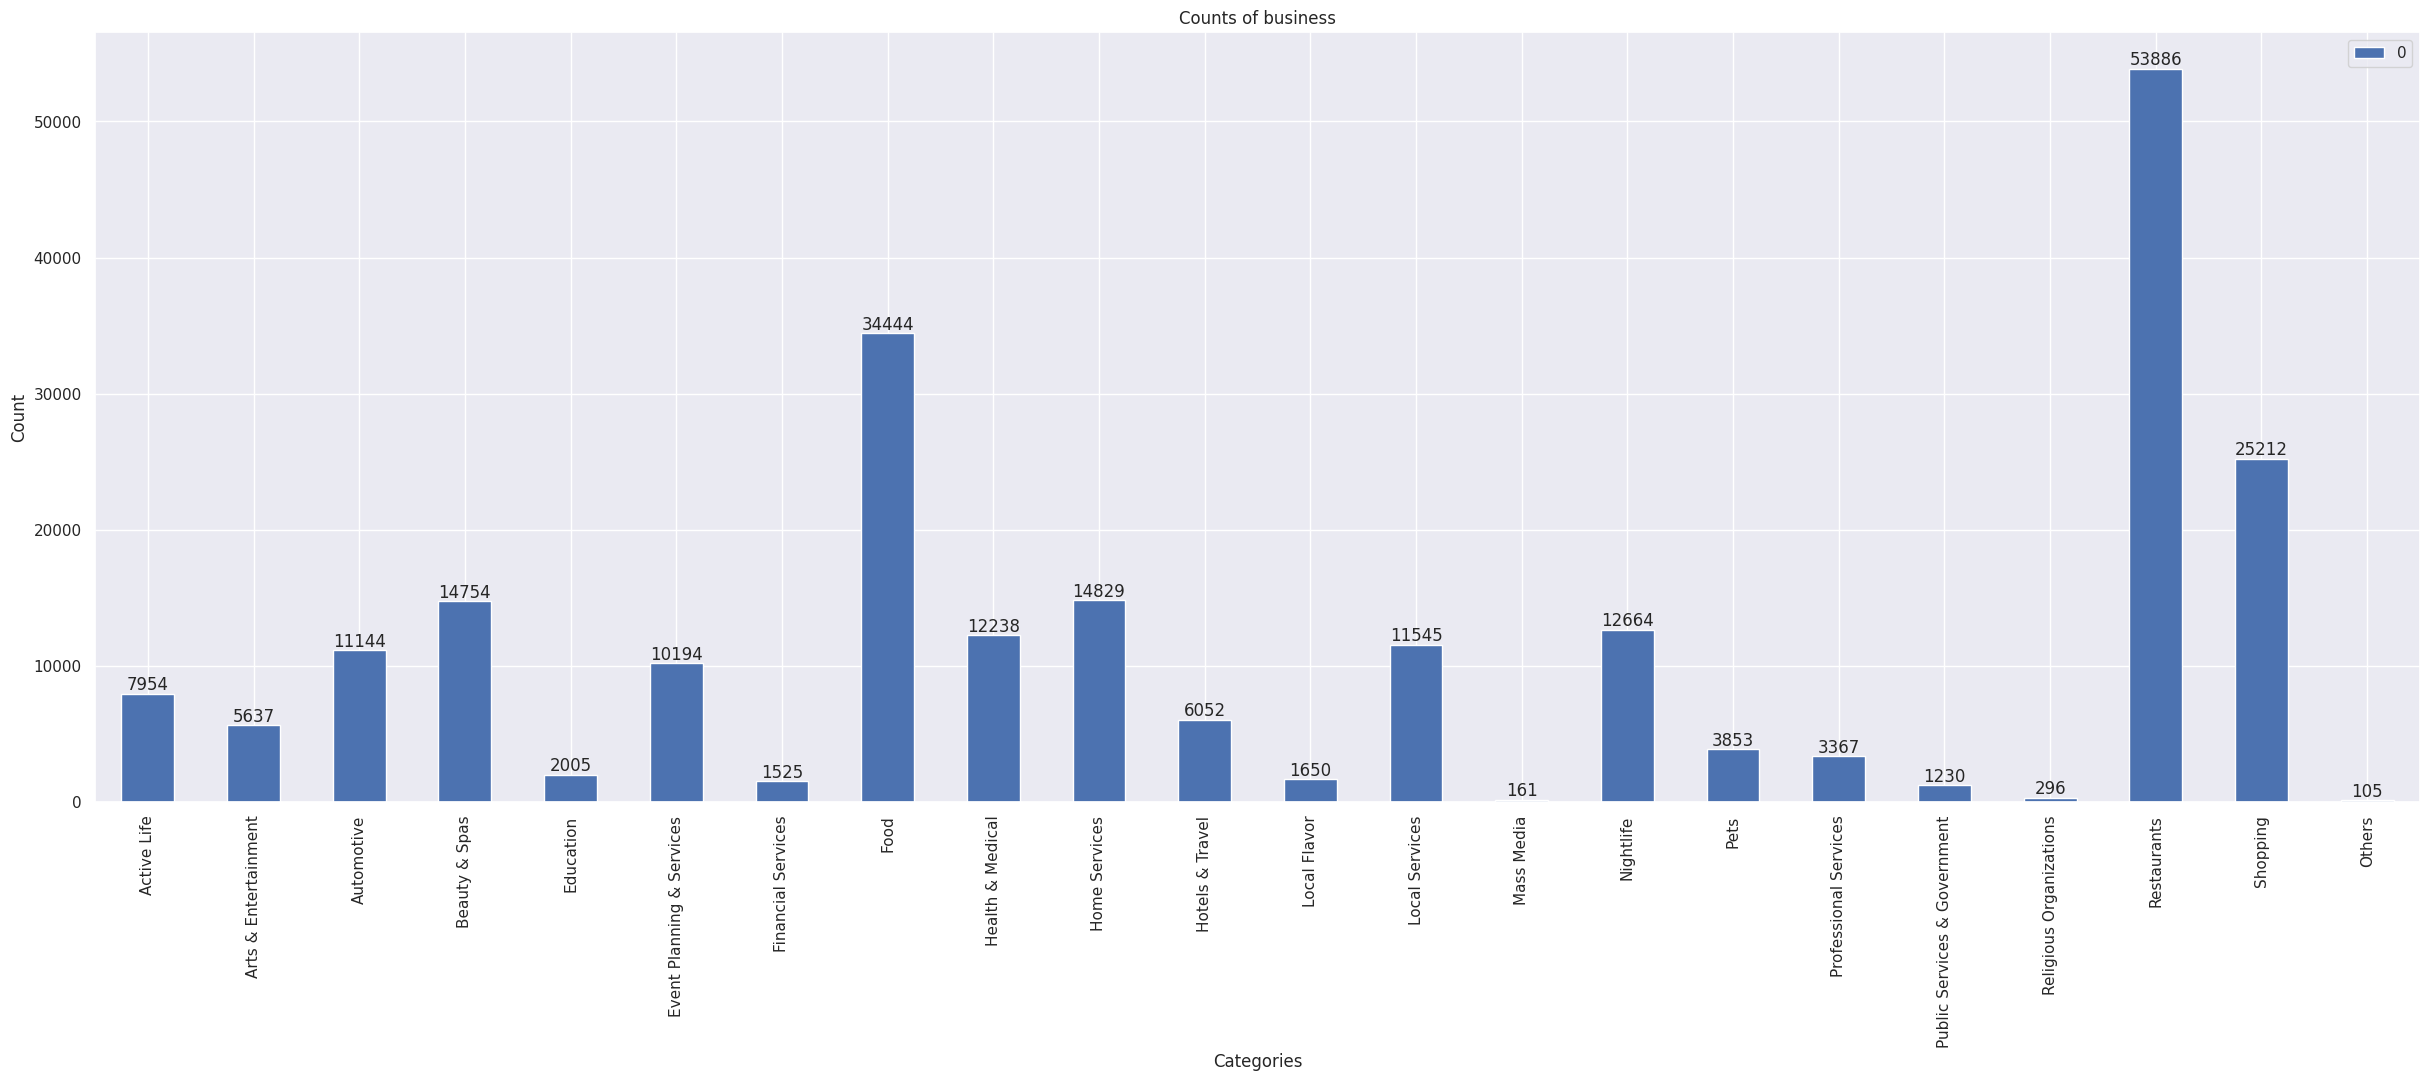

In [ ]:
test_df = pd.DataFrame([len(df.index) for df in new_category_df])
test_df.index = category_list

ax = test_df.plot(kind="bar", stacked = False)

for container in ax.containers:
  ax.bar_label(container)

plt.gcf().set_size_inches(30, 10)
plt.xlabel("Categories")
plt.ylabel("Count")
plt.title("Counts of business")
plt.show()

We first analyze the count for each main categories. We can clearly see that `Restaurants` has the highest number of business open of a count of `53886` and followed by `Food` with a count of `3444` business open. Next we can see that `Mass Media`, `Religious Organizations` and `Others` category has the lowest number of business open of less than `300`. We can clearly see which business is the most popular and which business is the least popular.

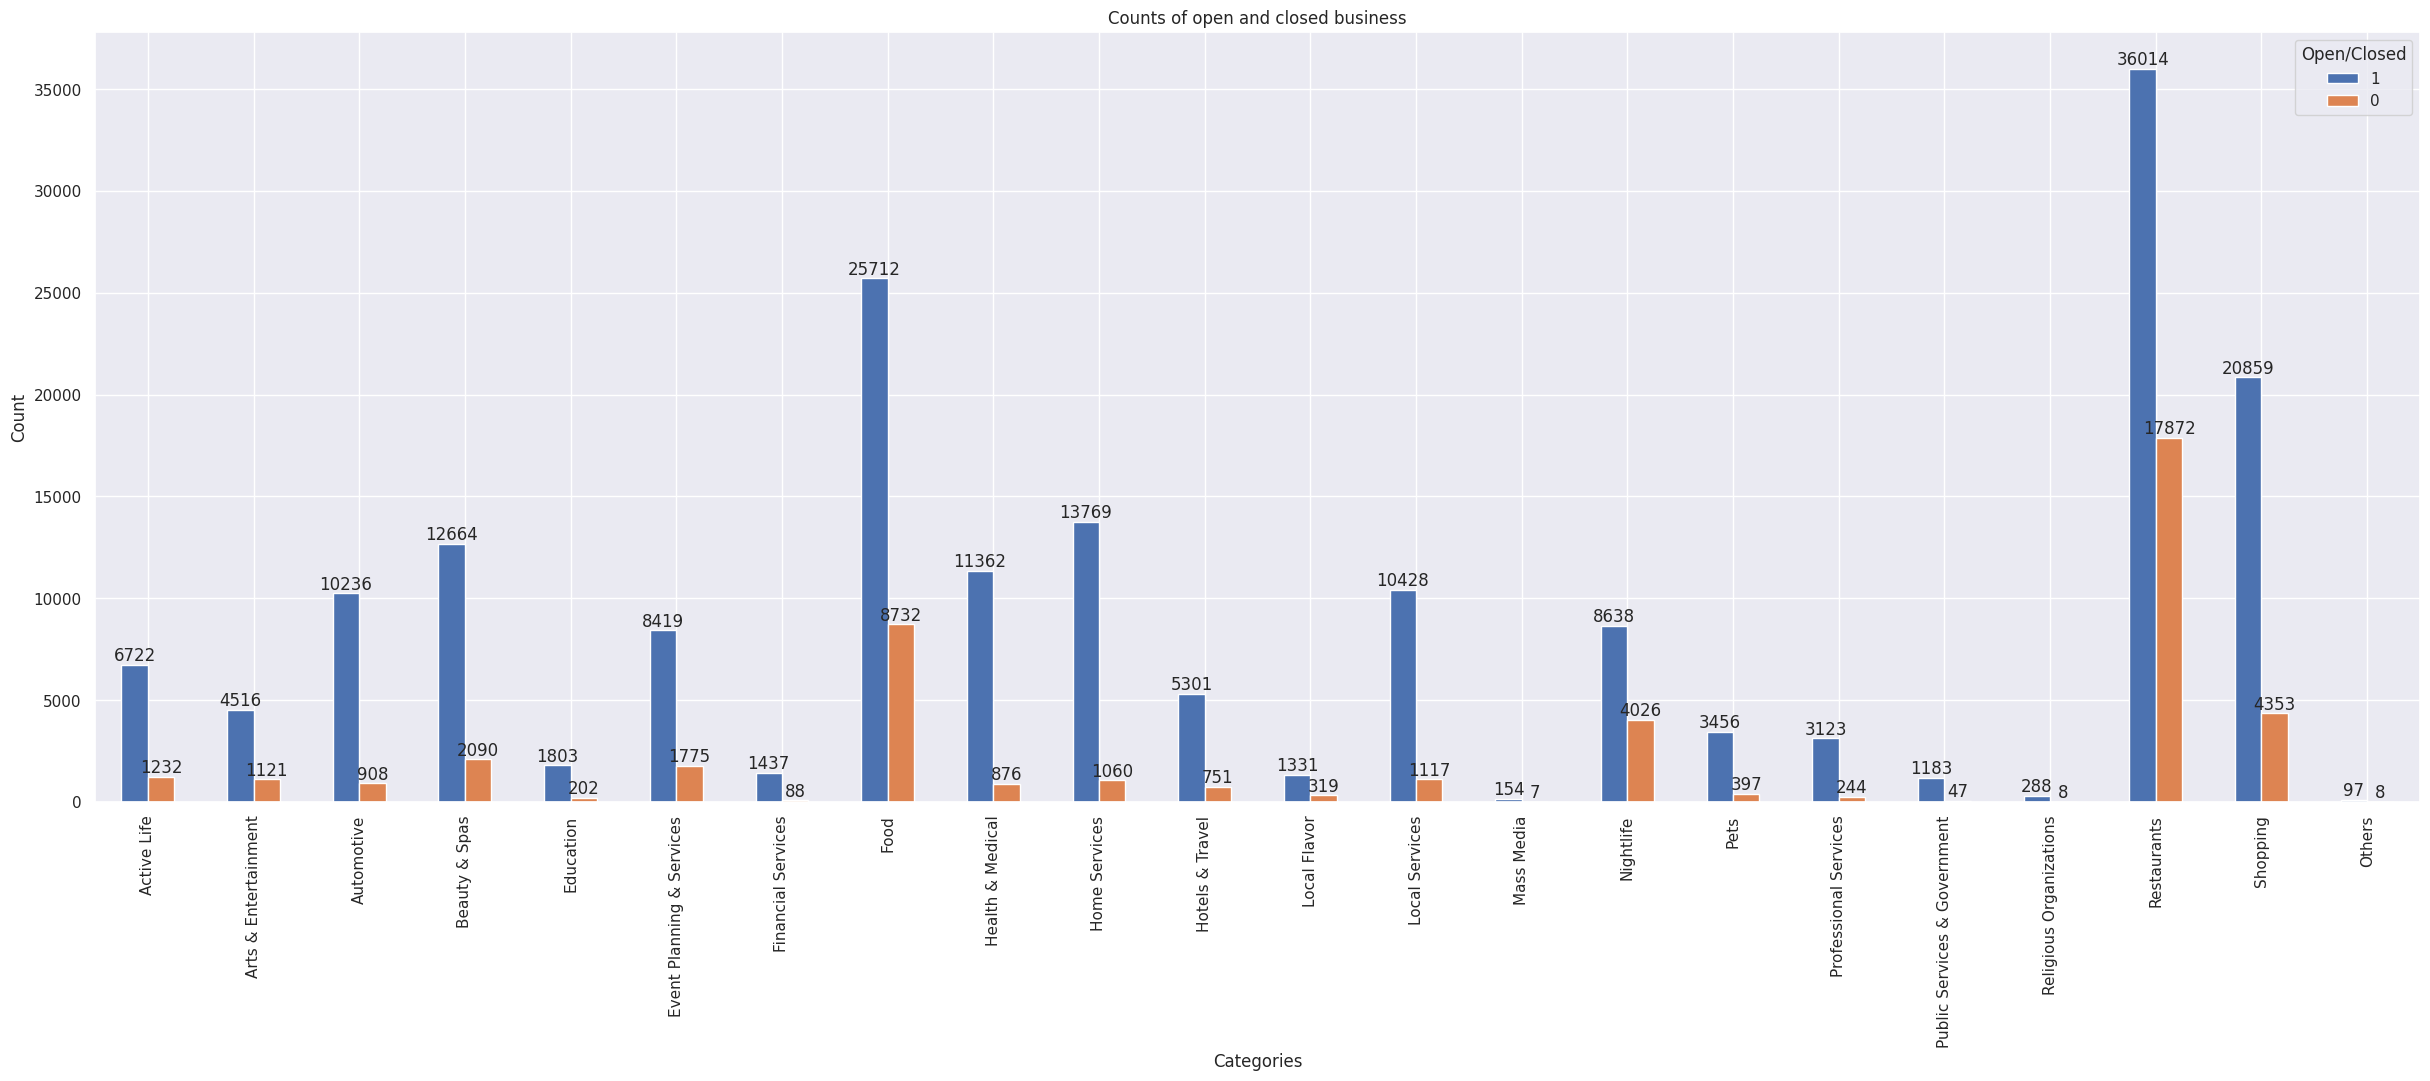

In [ ]:
def count_open_closed(df):
  return df["is_open"].value_counts()

test_df = pd.DataFrame([count_open_closed(df) for df in new_category_df])
test_df.index = category_list

ax = test_df.plot(kind="bar", stacked = False)

for container in ax.containers:
  ax.bar_label(container)

plt.gcf().set_size_inches(30, 10)
plt.xlabel("Categories")
plt.ylabel("Count")
plt.title("Counts of open and closed business")
plt.legend(title = "Open/Closed")
plt.show()

Next we take a look on how many business is still open or closed based on each main category. We can clearly see that `Restaurants` has the highest open and closed business of `36014` and `17872` respectively, followed by `Food` with `25712` open business and `8732` closed business. This can be explained as with higher number of business open, there will be a higher number of business closed due to competitiveness. 

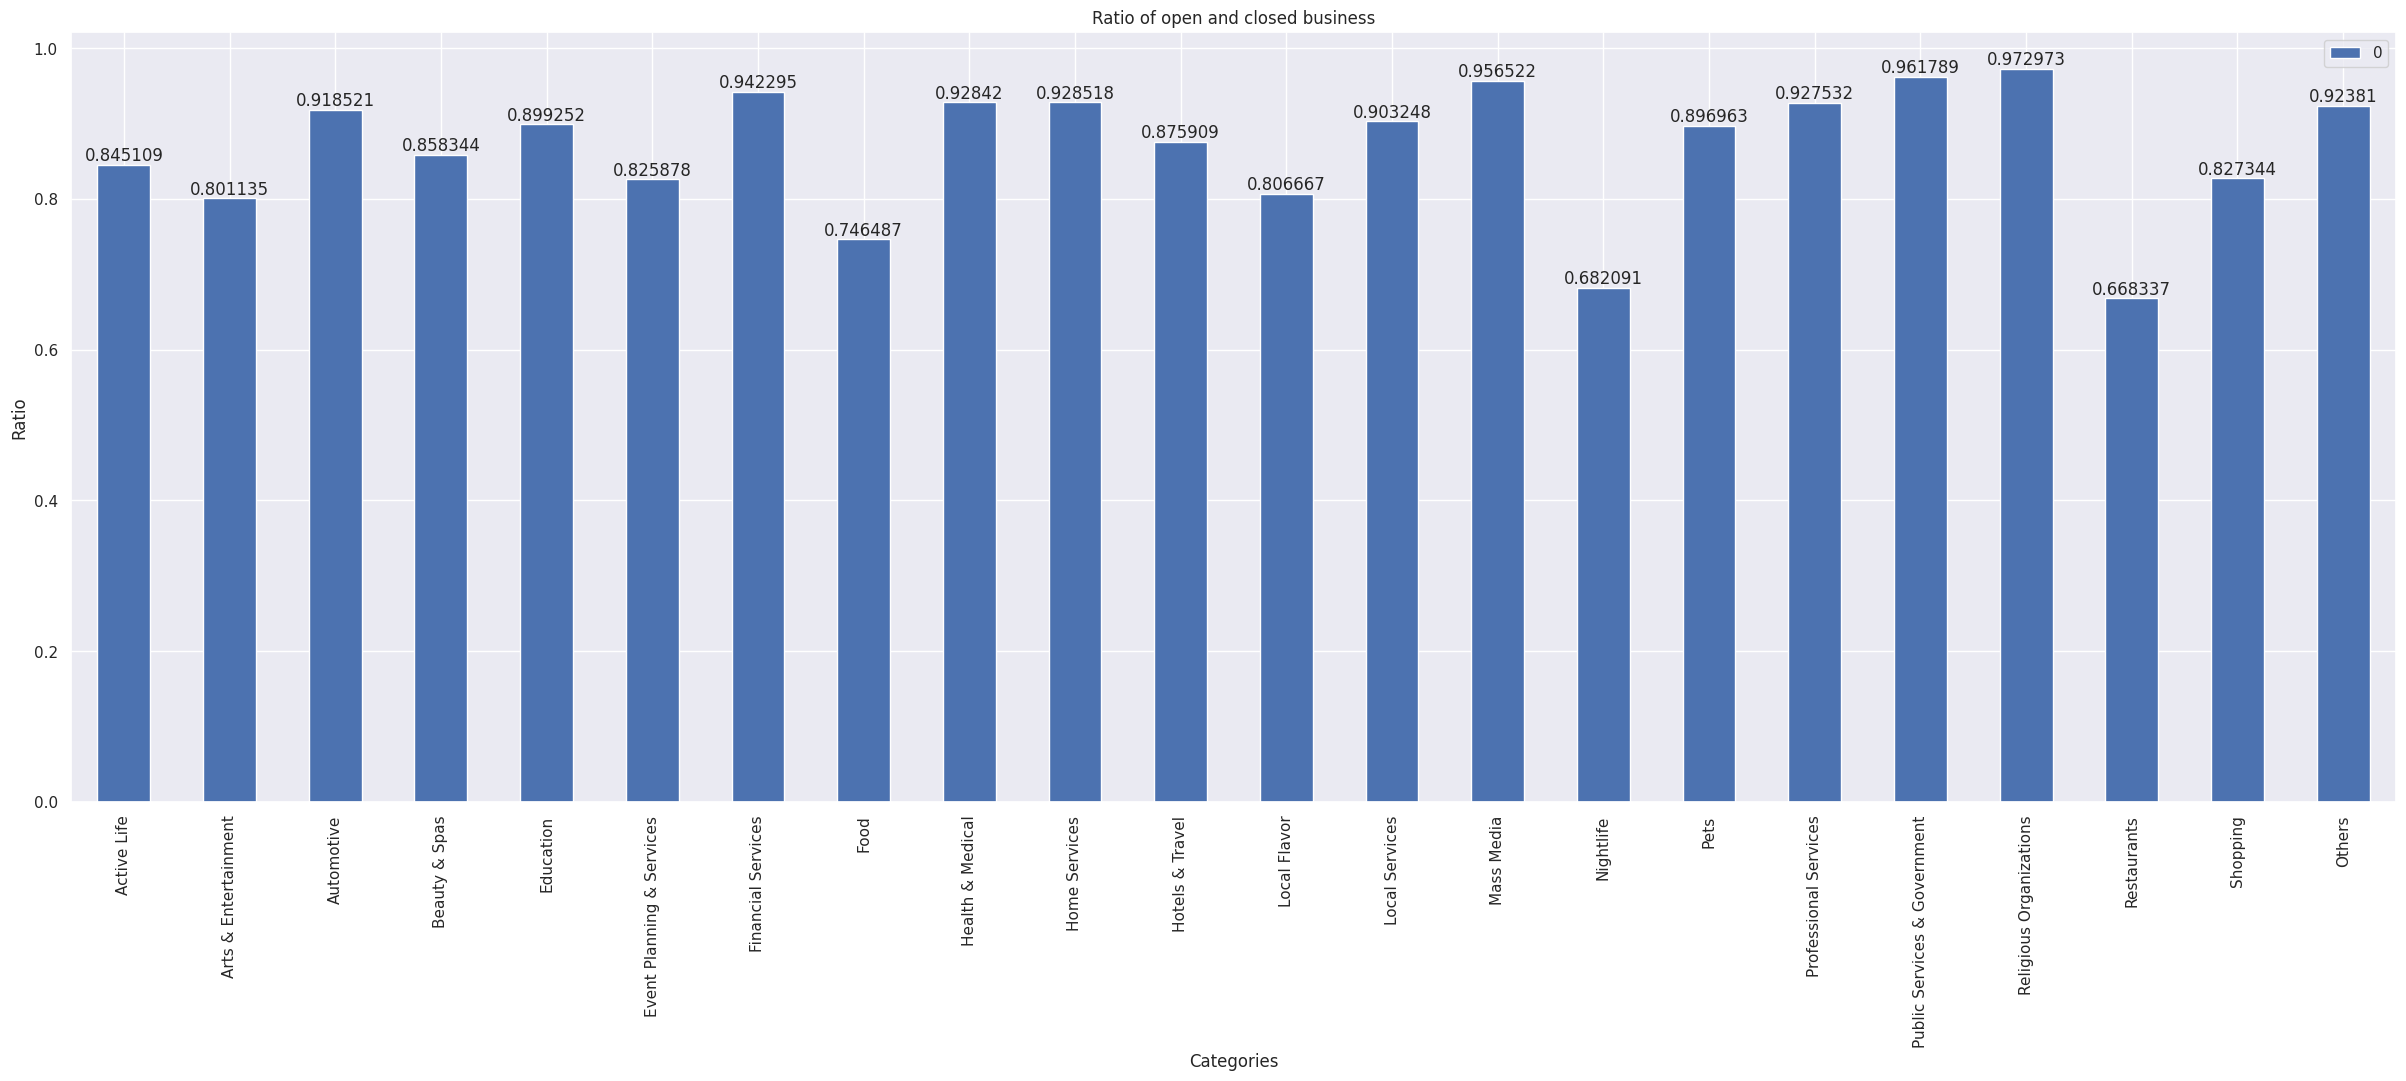

In [ ]:
def count_open_closed(df):
  return df["is_open"].value_counts()

test_df = pd.DataFrame([count_open_closed(df) for df in new_category_df])

ratio_df = pd.DataFrame([((test_df[1][index]) / (test_df[1][index] + test_df[0][index])) for index, x in enumerate(category_list)])
ratio_df.index = category_list

ax = ratio_df.plot(kind="bar", stacked = False)

for container in ax.containers:
  ax.bar_label(container)

plt.gcf().set_size_inches(30, 10)
plt.xlabel("Categories")
plt.ylabel("Ratio")
plt.title("Ratio of open and closed business")
plt.show()

## Question 4 Verdict
It is difficult to conclude that the category of business affects whether it will remain open. Even though there is a high business count in one category, it will logically have a higher possibility for that category of business to close due to competitiveness, while having low business count will result in a higher possibility for that category of business to remain open. So it will be best to choose a business category where there is a balance in both the number of business in that category open and the possibility for that category to remain open when one is opening a business, like `Shopping` and `Home Services`.